# Grid Search y Random Search: Métodos de búsqueda de hiperparámetros


### Grid search 
Es una búsqueda exhaustiva donde se prueban todas las combinaciones posibles de hiperparámetros en una grilla definida.

Ventajas:
- Encuentra la mejor combinación dentro del conjunto de hiperparámetros definido.
- Es reproducible y garantiza la mejor solución dentro de la grilla.

Desventajas:
- Muy costoso computacionalmente si hay muchos hiperparámetros y valores posibles.
- No explora valores fuera de la grilla definida.


### RandomSearch 

En lugar de probar todas las combinaciones, selecciona valores aleatorios dentro de un rango predefinido.

Ventajas:
- Más rápido que Grid Search.
- Permite explorar un espacio más amplio de hiperparámetros.

Desventajas:
- No garantiza encontrar la mejor combinación absoluta, pero sí una buena solución en menos tiempo.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

# --- Limpieza de datos ---
df = pd.read_csv('data/titanic.csv')
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df = pd.get_dummies(df)
del df['Sex_female']
df['Age'] = df['Age'].fillna(df.Age.mean())

# Variables predictoras y objetivo
X = df.drop('Survived', axis=1)
y = df['Survived']

# --- División en conjunto de entrenamiento y test (80%-20%) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### KNN

In [5]:
# Definir pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de datos
    ('knn', KNeighborsClassifier())  
])

params_grid = {
    'knn__n_neighbors': range(1, 30), 
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan'] 
}

GridSearch

In [ ]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=params_grid, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': range(1, 30),
                         'knn__weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [ ]:
grid_search.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 16, 'knn__weights': 'uniform'}

In [9]:
prob_knn_grid = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_score(y_score=prob_knn_grid, y_true=y_test)

0.8730418316405577

Random Search

In [19]:
# Random search, estimator, params_dist, n_iter, cv, n_jobs
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=params_grid, n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('knn', KNeighborsClassifier())]),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'knn__metric': ['euclidean',
                                                        'manhattan'],
                                        'knn__n_neighbors': range(1, 30),
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   scoring='roc_auc')

In [20]:
random_search.best_params_

{'knn__weights': 'uniform', 'knn__n_neighbors': 17, 'knn__metric': 'manhattan'}

In [21]:
prob_knn_random = random_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_score(y_score=prob_knn_random, y_true=y_test)

0.8701153382682045

### Regresion logistica

In [22]:
# Pipeline 
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),  # grado se definirá en grid search
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=10000, random_state=42))
])


In [30]:
# Grid Search 
# Parametros a buscar, polinomial degree, logistic regression C 
params_grid = {
    'poly__degree': [1, 2, 3],
    'logreg__penalty': ['l2', None],
    'logreg__C': [0.01, 0.1, 1]
}

log_reg_grid = GridSearchCV(estimator=pipeline, param_grid=params_grid, cv=5, n_jobs=-1, scoring='roc_auc')
log_reg_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1],
                         'logreg__penalty': ['l2', None],
                         'poly__degree': [1, 2, 3]},
             scoring='roc_auc')

In [31]:
log_reg_grid.best_params_

{'logreg__C': 0.1, 'logreg__penalty': 'l2', 'poly__degree': 2}

In [32]:
prob_log_reg_grid = log_reg_grid.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_score(y_score=prob_log_reg_grid, y_true=y_test)

0.8820221495380731

In [27]:
# Random search
log_reg_random = RandomizedSearchCV(estimator=pipeline, param_distributions=params_grid, n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
log_reg_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('poly',
                                              PolynomialFeatures(include_bias=False)),
                                             ('scaler', StandardScaler()),
                                             ('logreg',
                                              LogisticRegression(max_iter=10000,
                                                                 random_state=42))]),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'logreg__C': [0.01, 0.1, 1],
                                        'logreg__penalty': ['l2', None],
                                        'poly__degree': [1, 2, 3]},
                   scoring='roc_auc')

In [29]:
log_reg_random.best_params_

{'poly__degree': 2, 'logreg__penalty': 'l2', 'logreg__C': 0.1}

In [28]:
prob_log_reg_random = log_reg_random.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_score(y_score=prob_log_reg_random, y_true=y_test)

0.8820221495380731

## AUC continuación

Ejemplo, crédito:

Si tomas al azar una persona que si pago y una persona que no pago

El AUC es la probabilidad de que la persona que si pago tenga una predicción mayor


In [49]:
### AUC 
df_auc = pd.DataFrame({
    'probabilidad':prob_log_reg_random,
    'y_true':y_test
})

In [52]:
resultado = []
for i in range(100000):
    muestra_sobrevive = df_auc[df_auc['y_true'] == 1].sample()['probabilidad'].values[0]
    muestra_muere = df_auc[df_auc['y_true'] == 0].sample()['probabilidad'].values[0]
    resultado.append(muestra_sobrevive > muestra_muere)

In [53]:
np.mean(resultado)

0.8816

### Intervalo de confianza

In [63]:
auc_bootstrap = []

for i in range(10000):
    flag_frame = df_auc.sample(len(df_auc), replace=True)
    auc_bootstrap.append(roc_auc_score(y_score=flag_frame['probabilidad'], y_true=flag_frame['y_true']))

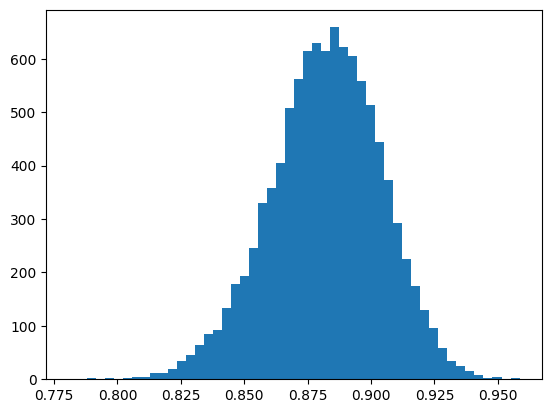

In [64]:
plt.hist(auc_bootstrap, bins=50)
plt.show()

In [65]:
df_auc_bootstrap = pd.DataFrame({
    'auc':auc_bootstrap
})
(df_auc_bootstrap['auc']>0.9).mean()

0.212

### Intervalo de confianza AUC 95%

In [66]:
# 1 --> Obtenemos el error estandard
se_auc = np.std(auc_bootstrap)
np.mean(auc_bootstrap) - 1.96*se_auc, np.mean(auc_bootstrap) + 1.96*se_auc

(0.8389950800566184, 0.9253718707621339)

### Regresión logistica con pesos 

Ejemplo, darle más peso a las personas más jovenes

In [70]:
model = LogisticRegression().fit(X_train, y_train)
prediccione_normal = model.predict_proba(X_test)[:,1]

c:\Users\epile\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
age_weights = 1 / X_train['Age']

In [74]:
model_weighted = LogisticRegression().fit(X_train, y_train, sample_weight=age_weights)
prediccione_weighted = model_weighted.predict_proba(X_test)[:,1]

c:\Users\epile\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
df_weight = pd.DataFrame({
    'age':X_test['Age'],
    'y_test':y_test,
    'prob_normal':prediccione_normal,
    'prob_weight':prediccione_weighted
})
df_weight.sort_values('age', ascending=False)

,age,y_test,prob_normal,prob_weight
96,71.00,0,0.296280,0.090545
493,71.00,0,0.305122,0.087053
33,66.00,0,0.082840,0.027629
54,65.00,0,0.333295,0.173662
456,65.00,0,0.183525,0.064138
...,...,...,...,...
63,4.00,0,0.101650,0.350979
10,4.00,1,0.677702,0.748887
7,2.00,0,0.114385,0.319208
305,0.92,1,0.601895,0.907033
